# Pacotes e funções importantes

In [ ]:
import warnings # Serve para ignorar mensagens de alerta que aparecem 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


from sklearn.metrics import mean_squared_error,classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV, validation_curve, learning_curve, train_test_split, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import math

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(3, 1, figsize=(15, 25))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Tamanho do conjunto de dados de treino")
    axes[0].set_ylabel("Pontuação (RMSE)")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring = 'neg_root_mean_squared_error',
                       verbose=1)
    train_scores_mean = -1*np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -1*np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Pontuação dos dados de treino")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Pontuação dos dados de validação")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Tamanho do conjunto de dados de treino")
    axes[1].set_ylabel("Tempo para criar o modelo (s)")
    axes[1].set_title("Escalabilidade do modelo")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Tempo para criar o modelo (s)")
    axes[2].set_ylabel("Pontuação (RMSE)")
    axes[2].set_title("Desempenho do modelo")

    return plt

In [ ]:
def confusion_matrix(model,X,y):
  matrix = plot_confusion_matrix(model,X,y,normalize='true',cmap=plt.cm.Reds)
  matrix.ax_.set_title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.gcf().set_size_inches(15,8)
  plt.show()

In [ ]:
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 20,
    'figure.figsize': (24,15)
})

# Importação e visualização inicial dos dados


In [ ]:
df = pd.read_csv('voice.csv') # Importando os dados do arquivo csv

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Significado dos atributos:**

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

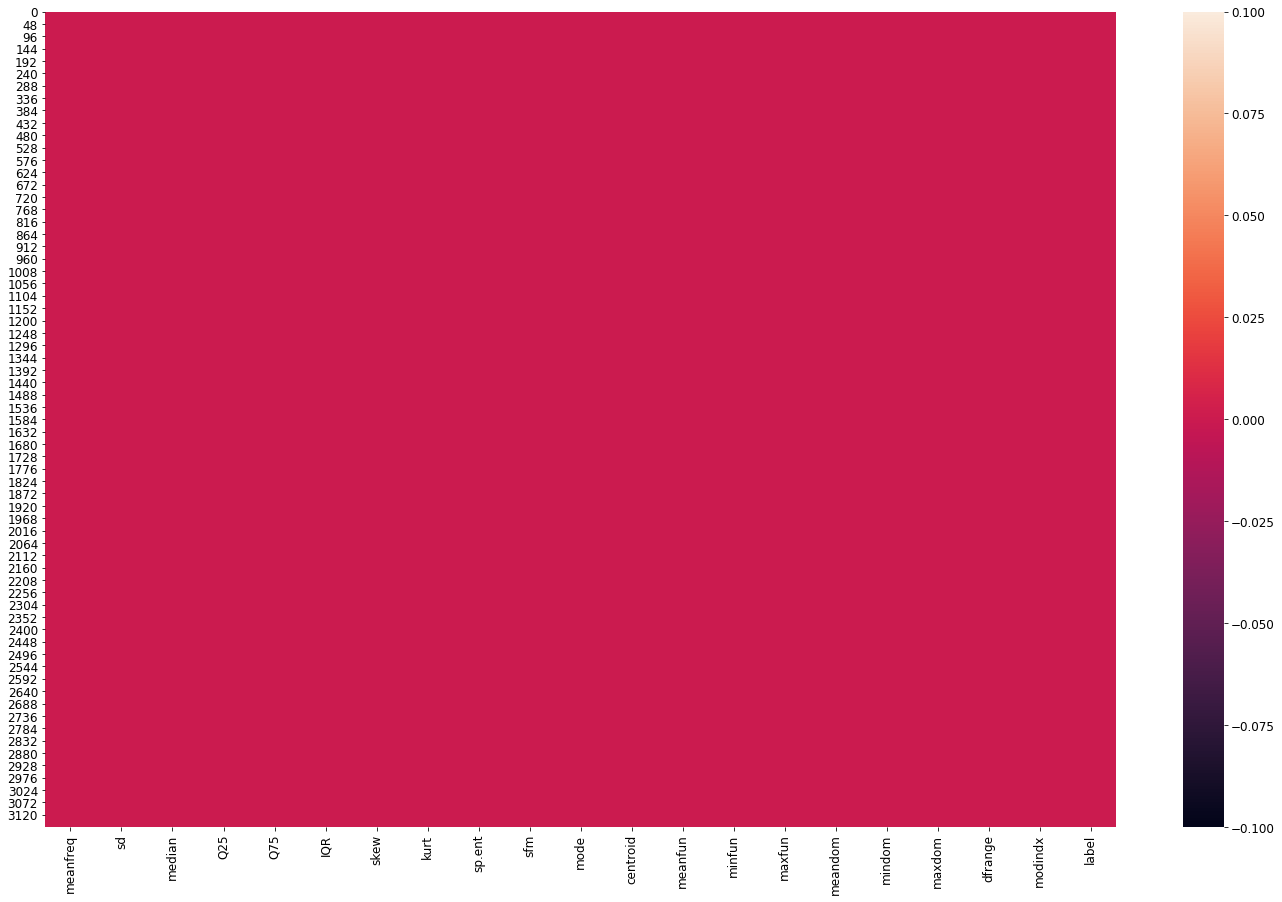

In [ ]:
is_missing = df.isnull() # Retorna uma matriz lógica com valores de 1 se estiver nulo e 0 se estiver preenchido. Serve para verificar dados faltantes de uma maneira visual
sns.heatmap(is_missing) 

Não há dados faltantes visto que a matriz só retornou valor nulo

# 1.0 Análise exploratória dos dados (EDA)

Vamos verificar a distribuição dos valores da nossa variável objetivo a fim de determinar se é um problema com dados desbalanceados ou não.

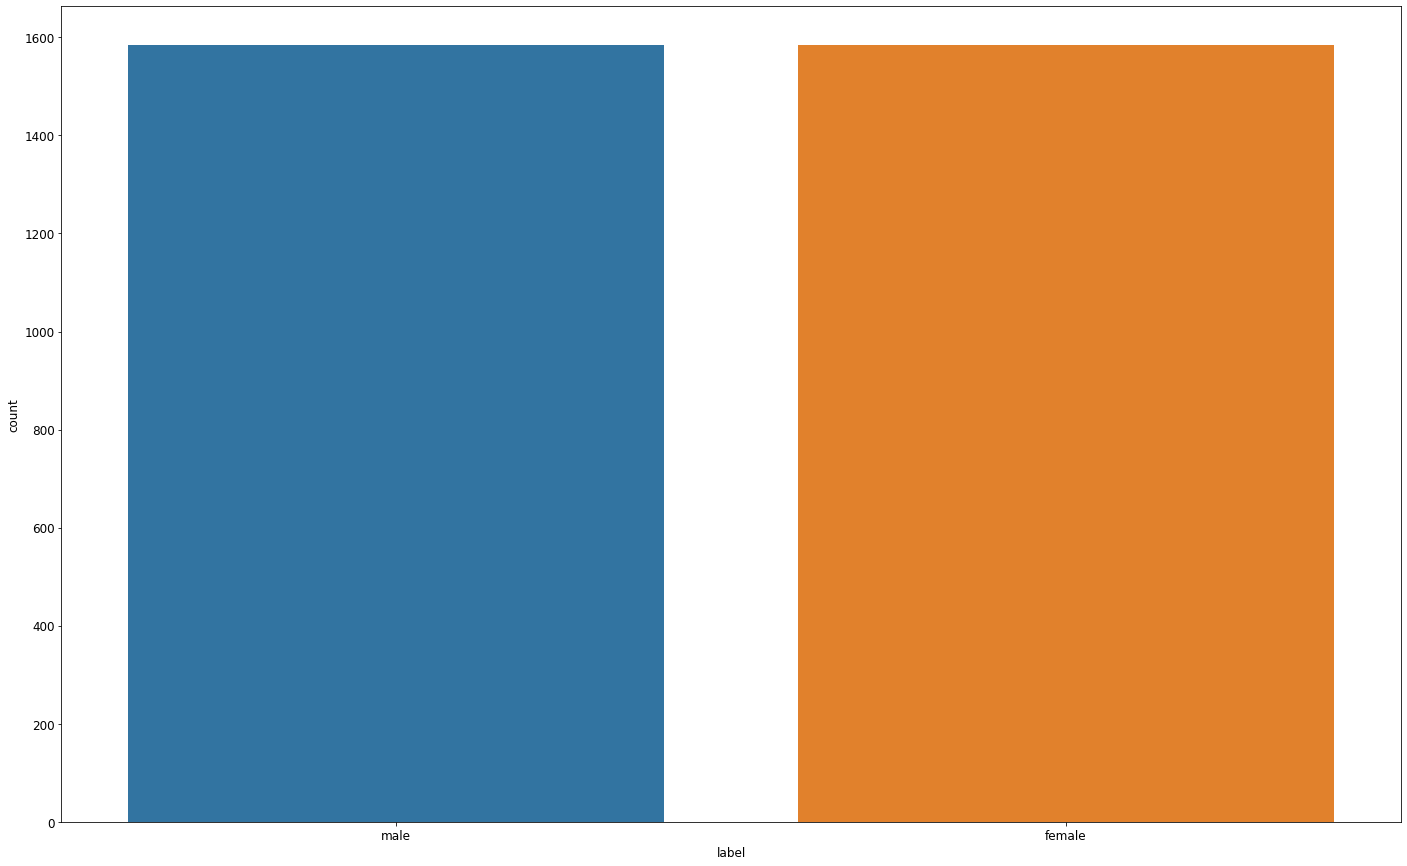

In [ ]:
sns.countplot(df['label'])

Por sorte, o problema é completamente balanceado

Podemos ver na linha 'top' que existe diversos valores estranhos nas variáveis. Temos que visualizar essas variáveis problemáticas a fim de verificar a existência de anomalias:

## 1.1 Boxplot dos dados

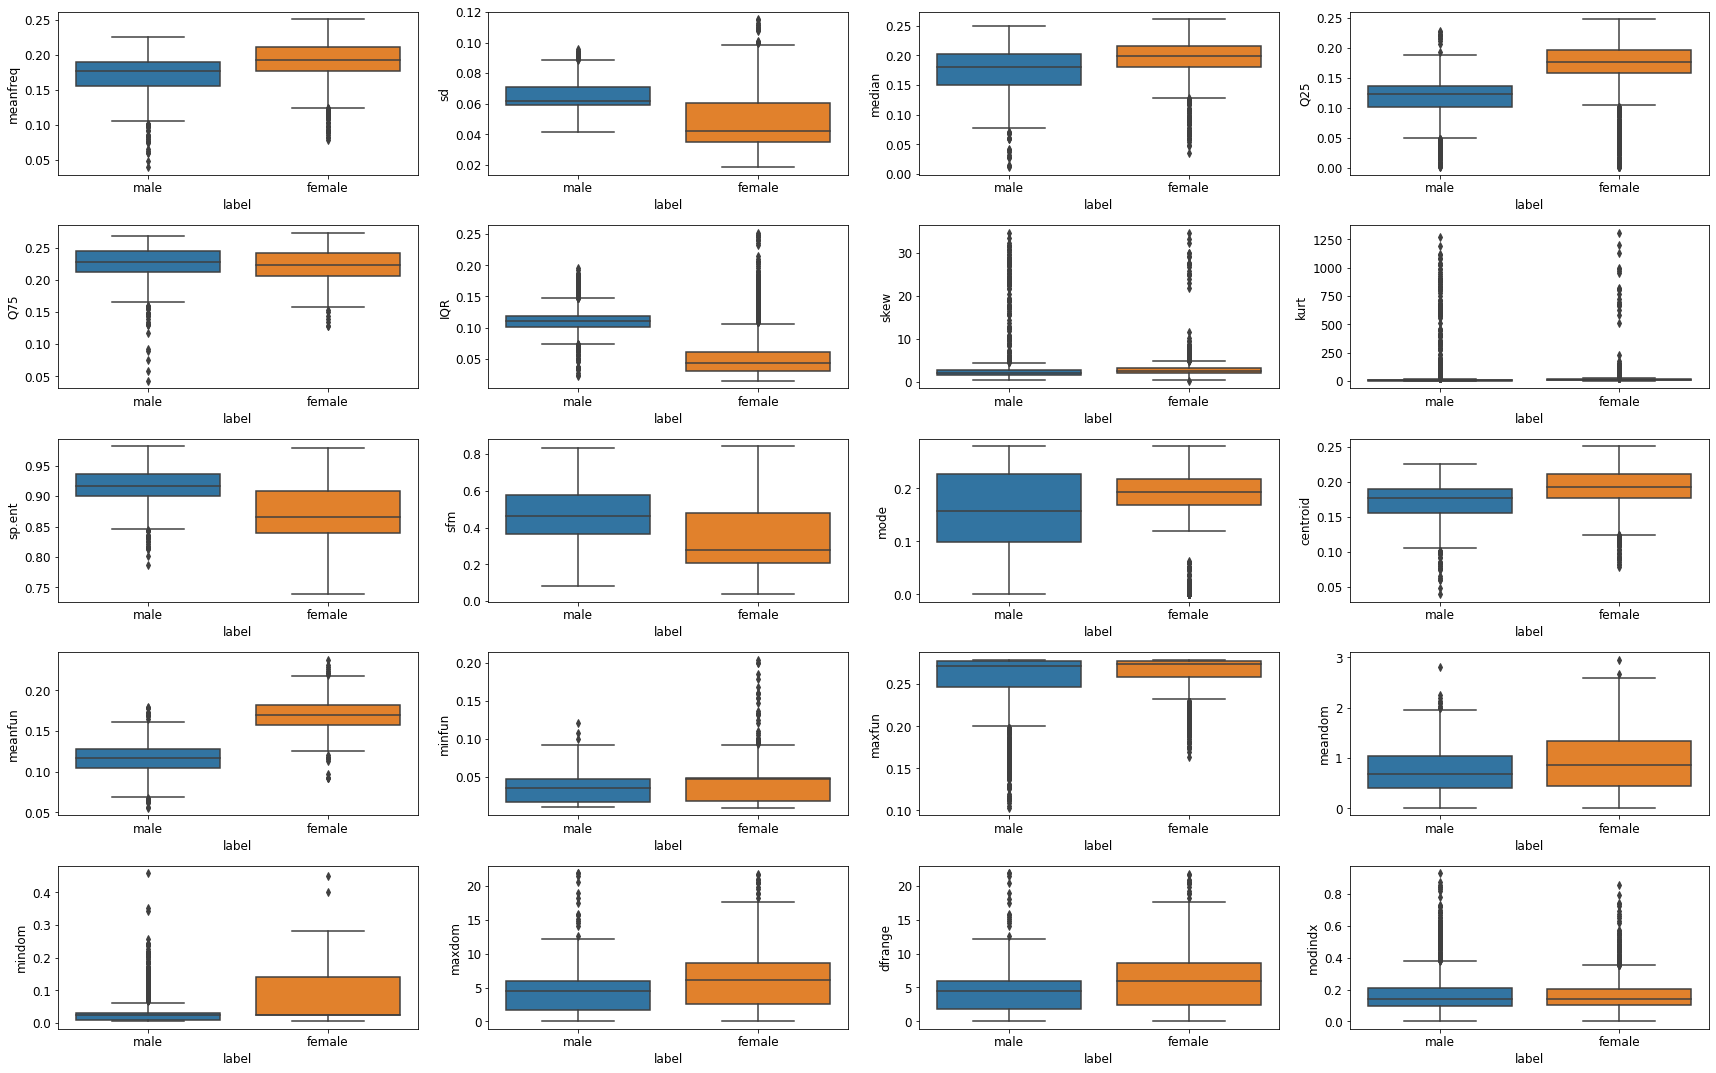

In [ ]:
for i in range(20):
  plt.subplot(5,4,i+1)
  sns.boxplot(data=df,x=df['label'],y=df.columns[i])
plt.tight_layout()

Todas as variáveis possuem outliers, mas as variáveis abaixo possuem um comportamento bem distinto comparado aos outros

- skew
- kurt

Como não temos conhecimento da área para afirmar se um outlier é devido a algum erro de medição ou algo inerente ao processo, **deve-se testar se a sua remoção melhoraria o desempenho do modelo de ML.**

## 1.2 Correlação entre as variáveis

Técnicas de correlação como de Pearson e Spearman não podem trabalhar com strings como a variável 'label', logo, deve-se aplicar um encoder nessa coluna de dados. A transformação realizada pelo LabelEncoder é mostrado abaixo:

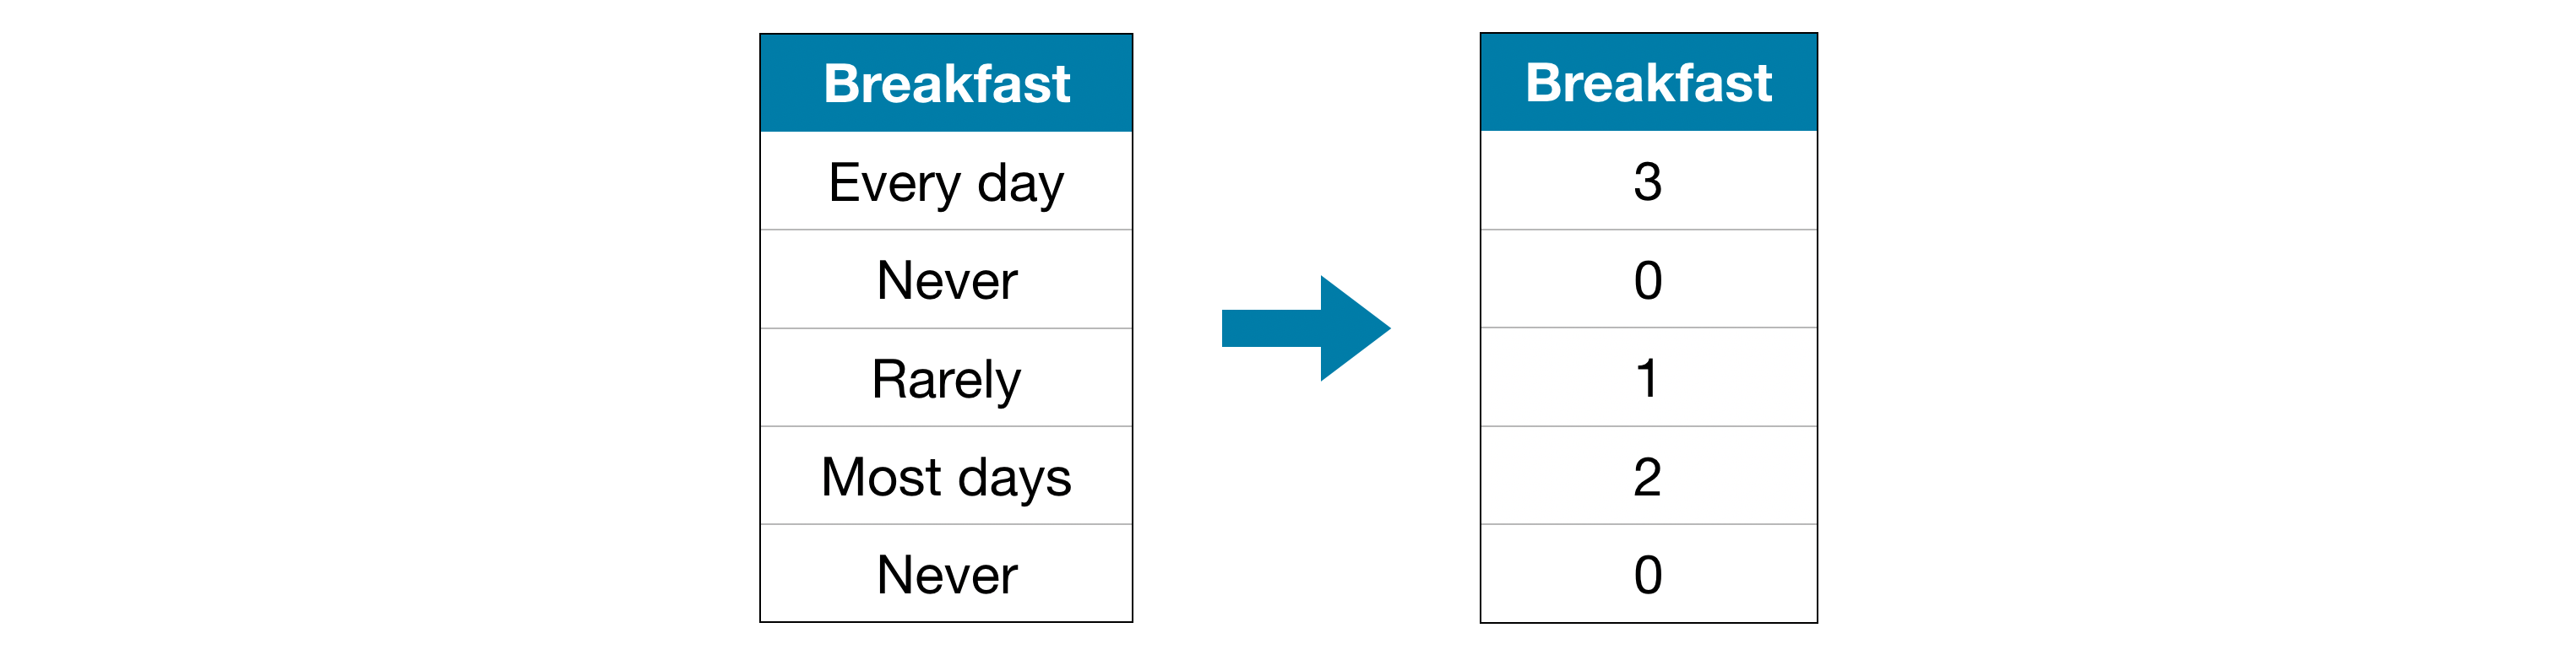

In [ ]:
label_df = df.copy() # Copiando o dataframe para realizar as operações em cima dessa cópia

label_encoder = LabelEncoder()
label_df['label'] = label_encoder.fit_transform(label_df['label'])

In [ ]:
label_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


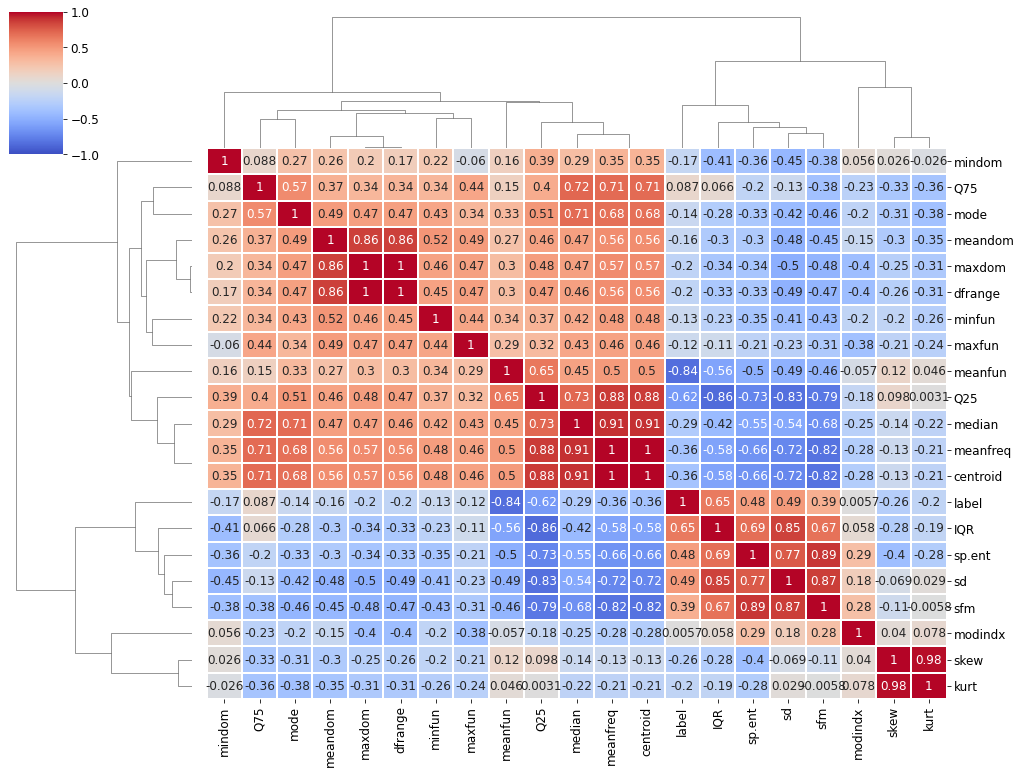

In [ ]:
corrMatrix = label_df.corr(method='spearman') # spearman coefficient can be used on numerical and ordinal variables (quality is ordinal). Pearson only has meaning for numerical values. 
g = sns.clustermap(corrMatrix, cmap="coolwarm", linewidths=1,annot=True,vmin = -1.0 , vmax=1.0, cbar_kws={"ticks":[-1,-0.5,0,0.5,1]}) 

g.fig.set_figwidth(15)
g.fig.set_figheight(11)

# Clustermaps do hierarchical clustering and orders the rows and columns based on similarity, making it easier to see correlations

Duas análises distintas podem ser feitas para: 

1 - Verificar a relação das variáveis independentes com a variável objetiva 'label'

2 - Verificar a relação entre as variáveis independentes a fim de remover informações redundantes

Nesse caso, vamos focar apenas na primeira análise

Vamos ver se existe alguma relação entre as variáveis independentes e a variável objetiva. Para isso, vamos dar um zoom na linha 'label'

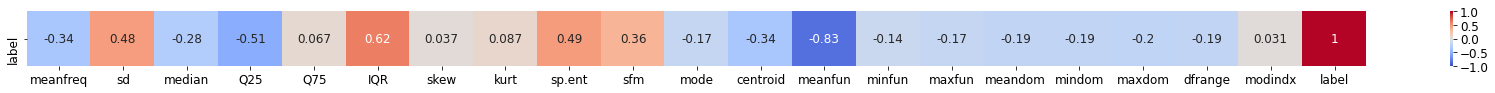

In [ ]:
# Plot do mapa de correlação das variáveis numéricas com a target
df_corr = pd.DataFrame(label_df.corr()['label'])
plt.figure(figsize = (30,1))
sns.heatmap(df_corr.transpose(),annot=True, cmap='coolwarm',vmin = -1.0 , vmax=1.0, cbar_kws={"ticks":[-1,-0.5,0,0.5,1]})   #Fica na horizontal

Podemos ver que as variáveis que não possuem correlação com a variável objetiva, considerando como limite o coeficiente de Spearman menor que 0.2, são:

- Q75
- skew
- kurt
- mode
- minfun
- meandom
- mindom
- maxdom
- dfrange
- modindx

As melhores para prever a variável objetiva, considerando um limite de Spearman maior que o módulo de 0.3, são

- meanfun (-0.83)
- IQR (0.62)
- Q25 (-0.51)
- sp. ent (0.49)
- sd (0.48)
- sfm (0.36)
- centroid (-0.34)
- meanfreq (-0.34)


## 1.3 Distribuição dos dados

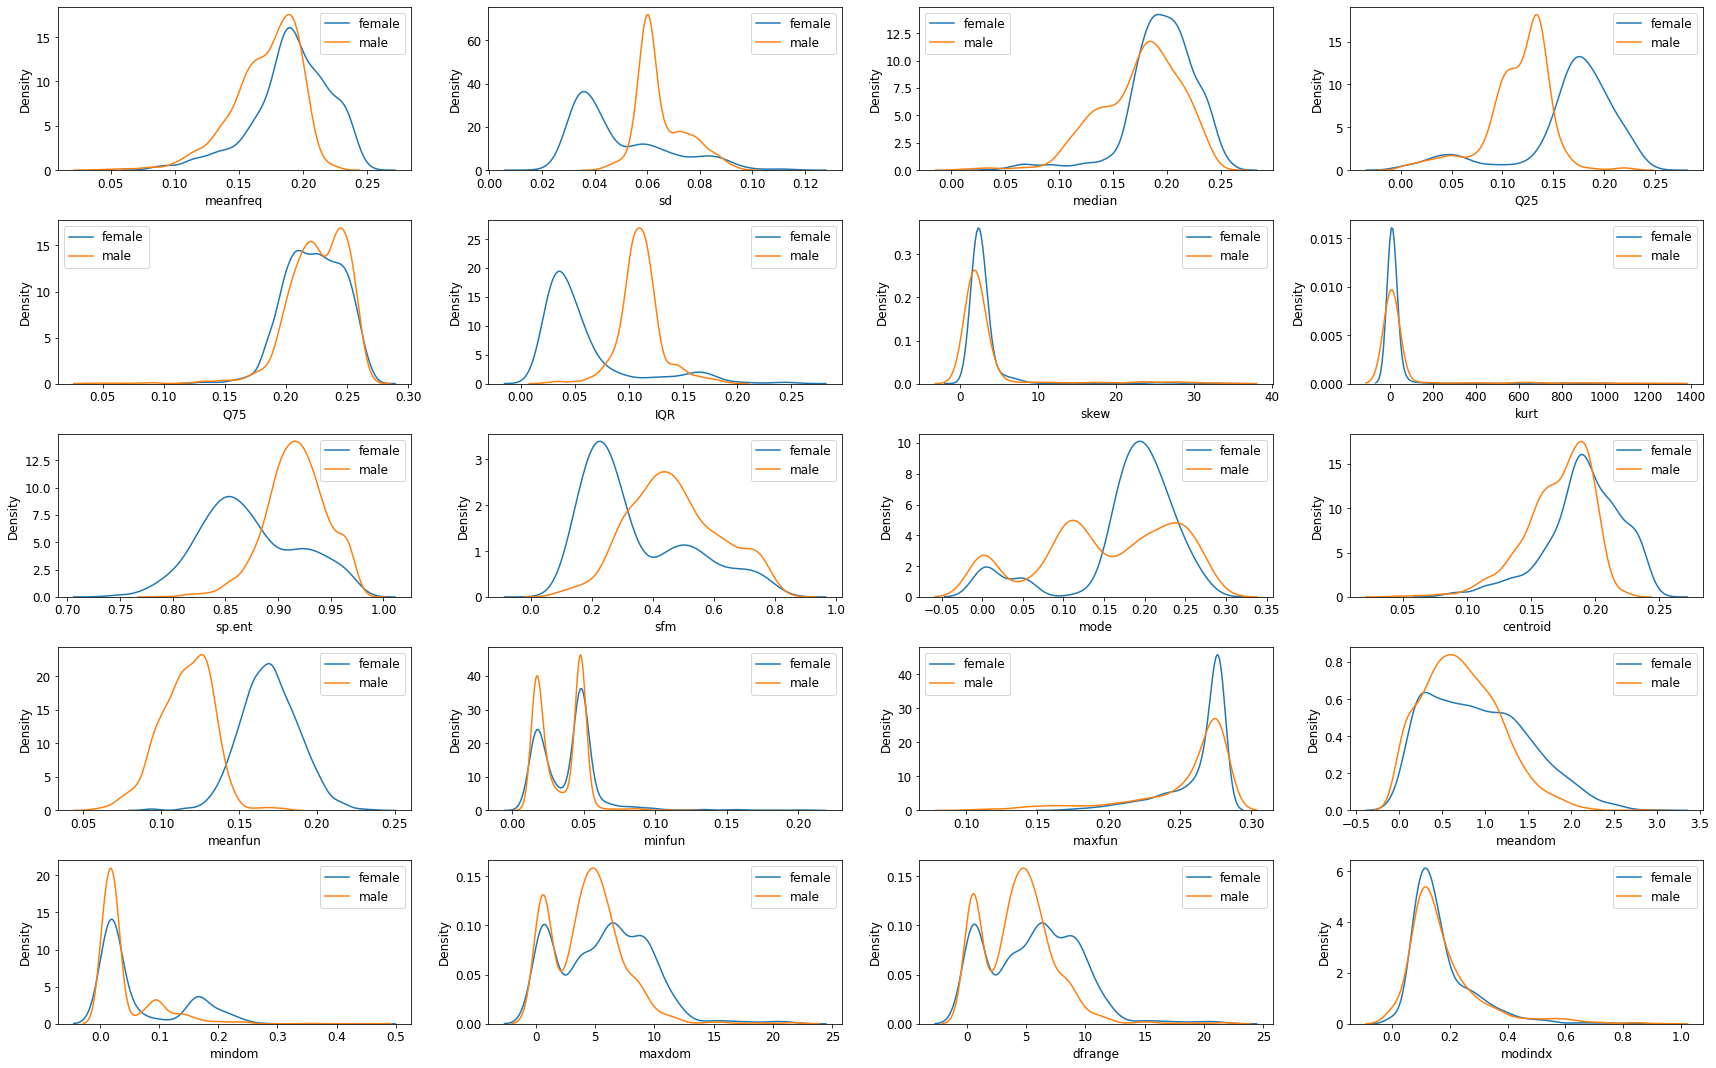

In [ ]:
df_female=df[df['label'] =='female']
df_male=df[df['label'] =='male']

for i in range(20):
  plt.subplot(5,4,i+1)

  sns.distplot(df_female[df_female.columns[i]], hist = False, kde = True,label='female')
  sns.distplot(df_male[df_male.columns[i]], hist = False, kde = True, label='male')

  plt.legend()
  plt.tight_layout()  

Para conseguir prever a diferença entre a voz de uma mulher ou de um homem, as variáveis independentes devem conseguir distinguir entre as duas categorias. Isso envolve ter regiões onde não se observa uma interseção entre as duas densidades acima

Abaixo está descrito o quão bom é a distinção entre os dados de maneira visual:

**1.  Distinção boa:**

* meanfun
* IQR
* Q25
* sd
* sp. ent

Todas as 5 variáveis acima também possuem um dos melhores coeficiente de correlação de Spearman. 

**2.  Distinção média:**

* sfm
* centroid
* meanfreq

As últimas 3 variáveis que possuem uma correlação de Spearman maior que 0.3

**3.  Distinção ruim:**

* Median
* Q75
* skew
* kurt
* mode
* minfun
* maxfun
* mindom
* maxdom
* dfrange
* modindx
* meandom

Todas as variáveis acima possui um coeficiente de Spearman pior que 0.2.

## 1.4 Resultados da EDA

Podemos ver que o a função densidade ou histograma junto com correlações podem ser utilizados em conjunto para entender as características dos dados. Uma complementa a outra e serve como forma de checar as conclusões.

Nesse caso existe um grande casamento entre as informações fornecidas pelos métodos distintos. 

Visto as variáveis que não tem correlação com o label, serão removidas as piores variáveis


In [ ]:
# Separação entre variáveis independentes e a dependente
y = label_df['label']
X = label_df.drop(['label'],axis=1)

In [ ]:
X = X.drop(['skew','kurt','Q75','modindx'],axis=1)

In [ ]:
X

,meanfreq,sd,median,Q25,IQR,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange
0,0.059781,0.064241,0.032027,0.015071,0.075122,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.073252,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875
2,0.077316,0.083829,0.036718,0.008701,0.123207,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812
3,0.151228,0.072111,0.158011,0.096582,0.111374,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688
4,0.135120,0.079146,0.124656,0.078720,0.127325,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.151859,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125
3164,0.116221,0.089221,0.076758,0.042718,0.162193,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625
3165,0.142056,0.095798,0.183731,0.033424,0.190936,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688
3166,0.143659,0.090628,0.184976,0.043508,0.176435,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938


# 2.0 Modelo base

Será utilizado o StratifiedShuffleSplit para gerar as pastas da validação cruzada após uma mistura dos dados iniciais visto que essa técnica vai manter a proporção das classes para cada pasta, conforme mostrado na figura abaixo:


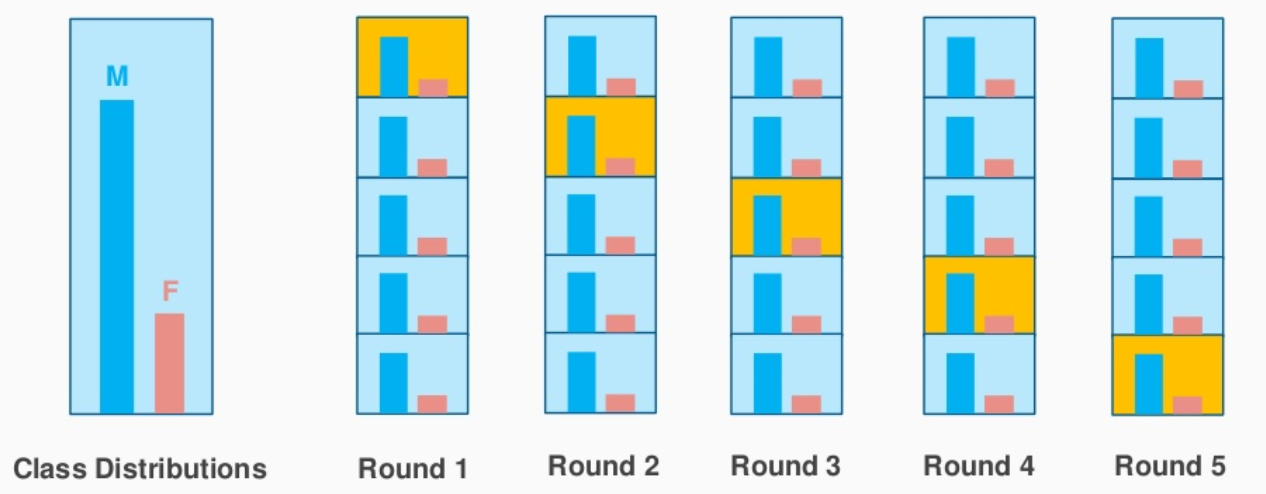

https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation#:~:text=Stratification%20is%20the%20process%20of%20rearranging%20the%20data,fold%2C%20each%20class%20comprises%20around%20half%20the%20instances. 

In [ ]:
folds = StratifiedShuffleSplit(n_splits=5, random_state=1) 

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
log_regression_base = LogisticRegression(random_state=1) 

cv_results = cross_val_score(log_regression_base, X_train, y_train, cv=folds, scoring='f1')

log_fitado = log_regression_base.fit(X_train,y_train)
y_predito_base = log_fitado.predict(X_test)

score = cv_results.mean()
print("F1 da validação cruzada do modelo base: ", score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


F1 da validação cruzada do modelo base:  0.8960466194878827


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(classification_report(y_test,y_predito_base))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       311
           1       0.87      0.97      0.92       323

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



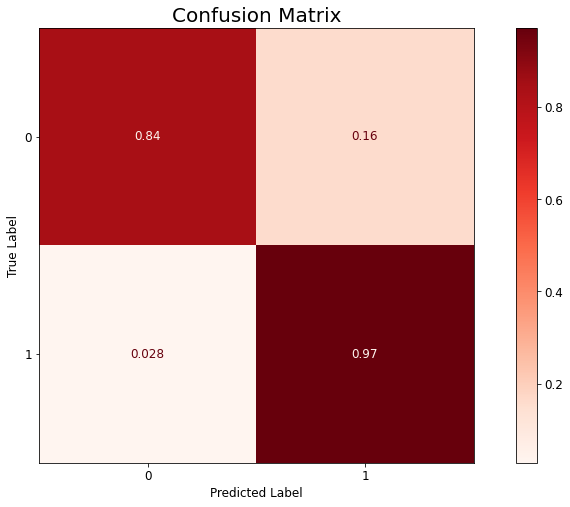

In [ ]:
confusion_matrix(log_regression_base,X_test,y_test)

É impossível criar o modelo sem o preprocessamento pois ele está mal condicionado.

**Conclusão:** Sempre deve-se realizar algum preprocessamento para os dados ficarem próximos da escala de 0 até +1 da regressão logística

# 2.1 Tratamento dos dados

É necessário verificar o quanto que os outliers afetam o resultado final, portanto, deve-se testar o modelo com os seguintes passos.

1. Criar um modelo base com nenhum preprocessamento (referência);
2. Verificar o desempenho do modelo ao remover os outliers (RobustScaler);
3. Verificar o desempenho do modelo ao escalonar os dados com média zero e 1 desvio padrão (StandardScaler);
4. Verificar o desempenho do modelo ao normalizar os dados
5. Comparar todas as opções e escolher o melhor

## 2.2 Modelos com preprocessamento

É necessário evitar vazamento de dados ao utilizar essas técnicas de preprocessamento. Para cada pasta de treino da validação cruzada, deve-se realizar a transformação e fitar o preprocessador enquanto que na pasta de teste, deve-se apenas aplicar a transformação.  

Fonte: http://thatdatatho.com/2018/10/04/cross-validation-the-wrong-way-right-way-feature-selection/#:~:text=The%20PC%20Magazine%20Encyclopediadefines%20data%20leakage%20as%3A%20The,set%20and%20the%20outside%20world%20the%20training%20set. 

https://towardsdatascience.com/pre-process-data-with-pipeline-to-prevent-data-leakage-during-cross-validation-e3442cca7fdc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Transformação das variáveis numéricas definida

scale_outliers = RobustScaler(quantile_range=(25,75))
scale_mean = StandardScaler()  
normalize = MinMaxScaler()

In [ ]:
modelo = LogisticRegression(random_state=1,solver='liblinear') # Modelo definido

# Parâmetros do GridSearchCV

C = np.logspace(-5, 7, 10) # Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
penalty = ['l1', 'l2']

parameters = {'modelo__C': C,
              'modelo__penalty': penalty}


In [ ]:
pipeline_scaled = Pipeline([('preprocessador',scale_mean),
                           ('modelo',modelo)
                          ])

pipeline_normalized = Pipeline([('preprocessador',normalize),
                                ('modelo',modelo)
                               ])

pipeline_outlier_scaled = Pipeline([('preprocessador',scale_outliers),
                                ('modelo',modelo)
                                 ])

In [ ]:
pipeline_final = [pipeline_scaled,pipeline_normalized,pipeline_outlier_scaled]

In [ ]:
train_score=[]
test_score=[]

for pipe in pipeline_final:

  search = GridSearchCV(estimator=pipe,
                        param_grid=parameters,
                        cv=folds,
                        scoring='f1',
                        return_train_score=True)

  search.fit(X_train,y_train)
  print("Melhores parâmetros do modelo ", search.best_params_)
  print("Melhor F1 :",search.best_score_)

Melhores parâmetros do modelo  {'modelo__C': 2.154434690031882, 'modelo__penalty': 'l2'}
Melhor F1 : 0.9740157480314962
Melhores parâmetros do modelo  {'modelo__C': 46.41588833612773, 'modelo__penalty': 'l1'}
Melhor F1 : 0.9740157480314962
Melhores parâmetros do modelo  {'modelo__C': 46.41588833612773, 'modelo__penalty': 'l2'}
Melhor F1 : 0.9740157480314962
